<a href="https://colab.research.google.com/github/GopalamDivyaSree/HTML-CSS_Programs/blob/main/currency_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content

drive  sample_data


In [ ]:
!ls /content/drive/MyDrive/currency_project

'america (1).pdf'     'Canada real.pdf'   england.pdf	 india.pdf
'australia real.pdf'   china.pdf	 'europe .pdf'	 UAE_REAL.pdf


In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 1s (325 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os

countries = ["america","australia","canada","china","england","europe","india","uae"]

for country in countries:
    os.makedirs(f"/content/dataset/{country}", exist_ok=True)

print("Folders created")

Folders created


In [ ]:
from pdf2image import convert_from_path

pdf_files = {
    "america": "/content/drive/MyDrive/currency_project/america (1).pdf",
    "australia": "/content/drive/MyDrive/currency_project/australia real.pdf",
    "canada": "/content/drive/MyDrive/currency_project/Canada real.pdf",
    "china": "/content/drive/MyDrive/currency_project/china.pdf",
    "england": "/content/drive/MyDrive/currency_project/england.pdf",
    "europe": "/content/drive/MyDrive/currency_project/europe .pdf",
    "india": "/content/drive/MyDrive/currency_project/india.pdf",
    "uae": "/content/drive/MyDrive/currency_project/UAE_REAL.pdf"
}

for country, path in pdf_files.items():

    pages = convert_from_path(path, dpi=300)

    for i, page in enumerate(pages):
        page.save(f"/content/dataset/{country}/{country}_{i}.jpg", "JPEG")

print("✅ PDF Conversion Completed")

✅ PDF Conversion Completed


In [ ]:
!ls /content/dataset

america  australia  canada  china  england  europe  india  uae


In [ ]:
import os

base_path = "/content/dataset"

print("=== IMAGE COUNT PER COUNTRY ===\n")

for country in os.listdir(base_path):
    country_path = os.path.join(base_path, country)
    count = len(os.listdir(country_path))
    print(f"{country}: {count} images")

=== IMAGE COUNT PER COUNTRY ===

australia: 9 images
canada: 12 images
uae: 17 images
india: 16 images
china: 8 images
england: 16 images
europe: 15 images
america: 4 images


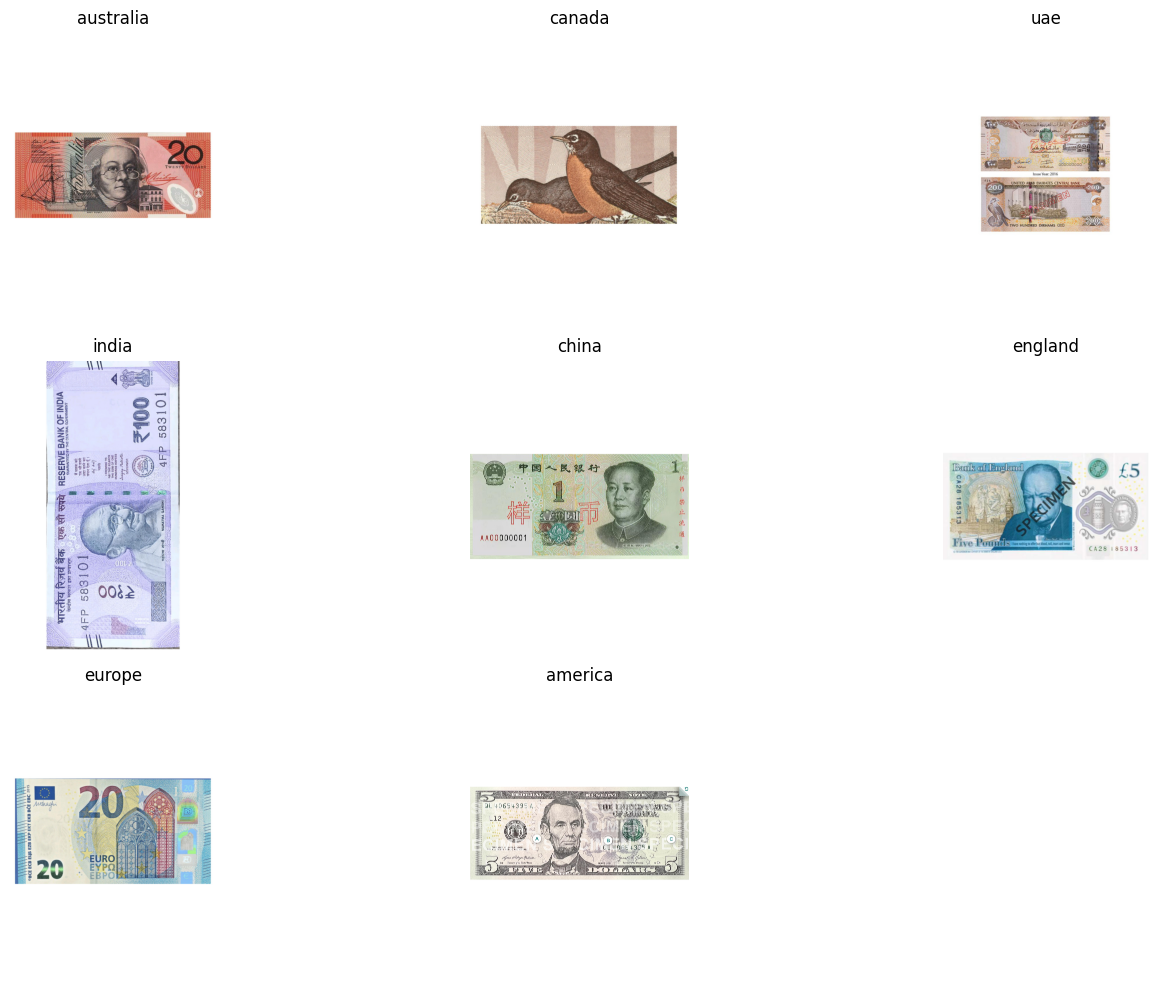

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

base_path = "/content/dataset"

plt.figure(figsize=(15,10))

for i, country in enumerate(os.listdir(base_path)):

    country_path = os.path.join(base_path, country)
    images = os.listdir(country_path)

    if len(images) > 0:
        img_path = os.path.join(country_path, random.choice(images))
        img = Image.open(img_path)

        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(country)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
total_images = 0

for country in os.listdir(base_path):
    total_images += len(os.listdir(os.path.join(base_path, country)))

print("Total Images in Dataset:", total_images)

Total Images in Dataset: 97


In [ ]:
import os

base_path = "/content/dataset"

print("=== CURRENT IMAGE COUNT ===\n")

for country in os.listdir(base_path):
    count = len(os.listdir(os.path.join(base_path, country)))
    print(f"{country}: {count}")

=== CURRENT IMAGE COUNT ===

australia: 9
canada: 12
uae: 17
india: 16
china: 8
england: 16
europe: 15
america: 4


In [ ]:
australia: 9
canada: 12
uae: 17
india: 16
china: 8
england: 16
europe: 15
america: 4

In [ ]:
from PIL import Image
import os

base_path = "/content/dataset"

for country in os.listdir(base_path):
    folder = os.path.join(base_path, country)

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        img = img.resize((224,224))
        img.save(img_path)

print("✅ Resizing Completed")

✅ Resizing Completed


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

base_path = "/content/dataset"
target_count = 100

for country in os.listdir(base_path):

    folder = os.path.join(base_path, country)
    images = os.listdir(folder)
    current_count = len(images)

    print(f"{country} before: {current_count}")

    while current_count < target_count:

        for img_name in images:

            img_path = os.path.join(folder, img_name)
            img = load_img(img_path, target_size=(224,224))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            for batch in datagen.flow(
                x,
                batch_size=1,
                save_to_dir=folder,
                save_prefix="aug",
                save_format="jpg"):

                current_count += 1
                break

            if current_count >= target_count:
                break

    print(f"{country} after: {current_count}")

print("✅ All classes expanded to 100 images")

australia before: 9
australia after: 100
canada before: 12
canada after: 100
uae before: 17
uae after: 100
india before: 16
india after: 100
china before: 8
china after: 100
england before: 16
england after: 100
europe before: 15
europe after: 100
america before: 4
america after: 100
✅ All classes expanded to 100 images


In [ ]:
for country in os.listdir(base_path):
    count = len(os.listdir(os.path.join(base_path, country)))
    print(f"{country}: {count}")

australia: 99
canada: 100
uae: 100
india: 100
china: 100
england: 99
europe: 100
america: 100


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

datagen = ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

base_path = "/content/dataset"

for country in ["australia", "england"]:

    folder = os.path.join(base_path, country)
    images = os.listdir(folder)
    current_count = len(images)

    if current_count < 100:
        img_name = np.random.choice(images)
        img_path = os.path.join(folder, img_name)

        img = load_img(img_path, target_size=(224,224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        for batch in datagen.flow(
                x,
                batch_size=1,
                save_to_dir=folder,
                save_prefix="aug",
                save_format="jpg"):
            break

print("✅ Australia & England updated")

✅ Australia & England updated


In [ ]:
for country in os.listdir("/content/dataset"):
    count = len(os.listdir(os.path.join("/content/dataset", country)))
    print(f"{country}: {count}")

australia: 100
canada: 100
uae: 100
india: 100
china: 100
england: 100
europe: 100
america: 100


In [ ]:
import os
import random
import shutil

# Remove old split if exists
if os.path.exists("/content/final_dataset"):
    shutil.rmtree("/content/final_dataset")

base_dir = "/content/dataset"
split_dir = "/content/final_dataset"

for country in os.listdir(base_dir):

    images = os.listdir(os.path.join(base_dir, country))
    random.shuffle(images)

    train_split = 60
    val_split = 80

    splits = {
        "train": images[:train_split],
        "val": images[train_split:val_split],
        "test": images[val_split:]
    }

    for split in splits:
        os.makedirs(os.path.join(split_dir, split, country), exist_ok=True)

        for img in splits[split]:
            shutil.copy(
                os.path.join(base_dir, country, img),
                os.path.join(split_dir, split, country, img)
            )

print("✅ 60-20-20 Split Completed")

✅ 60-20-20 Split Completed


In [ ]:
for country in os.listdir("/content/final_dataset/val"):
    count = len(os.listdir(os.path.join("/content/final_dataset/val", country)))
    print(f"{country}: {count} validation images")

australia: 20 validation images
canada: 20 validation images
uae: 20 validation images
india: 20 validation images
china: 20 validation images
england: 20 validation images
europe: 20 validation images
america: 20 validation images


In [ ]:
for country in os.listdir("/content/final_dataset/val"):
    count = len(os.listdir(os.path.join("/content/final_dataset/val", country)))
    print(f"{country}: {count} validation images")

australia: 20 validation images
canada: 20 validation images
uae: 20 validation images
india: 20 validation images
china: 20 validation images
england: 20 validation images
europe: 20 validation images
america: 20 validation images


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/final_dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    '/content/final_dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    '/content/final_dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


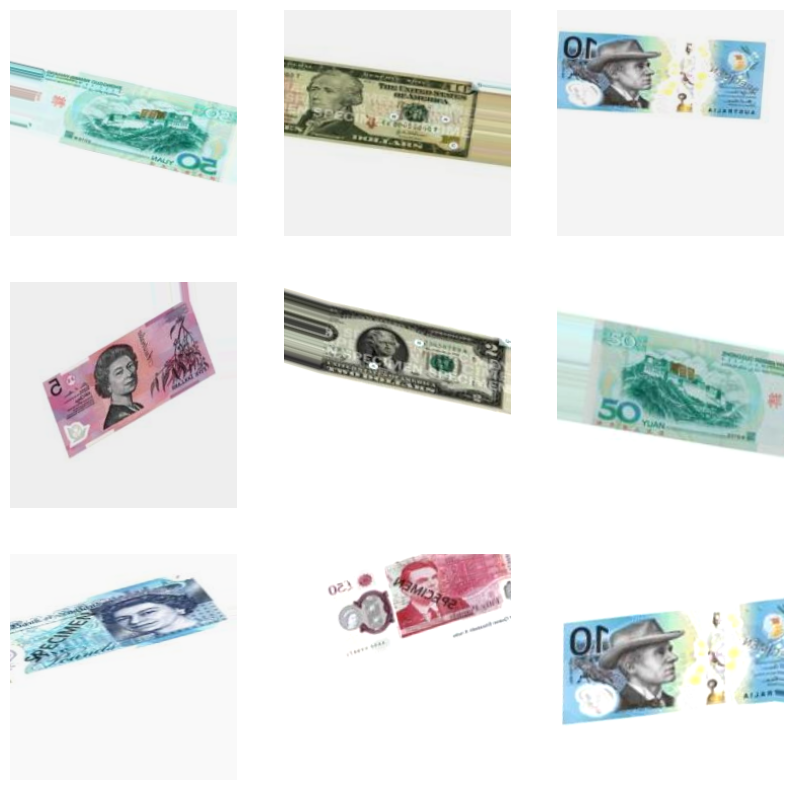

In [ ]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.show()

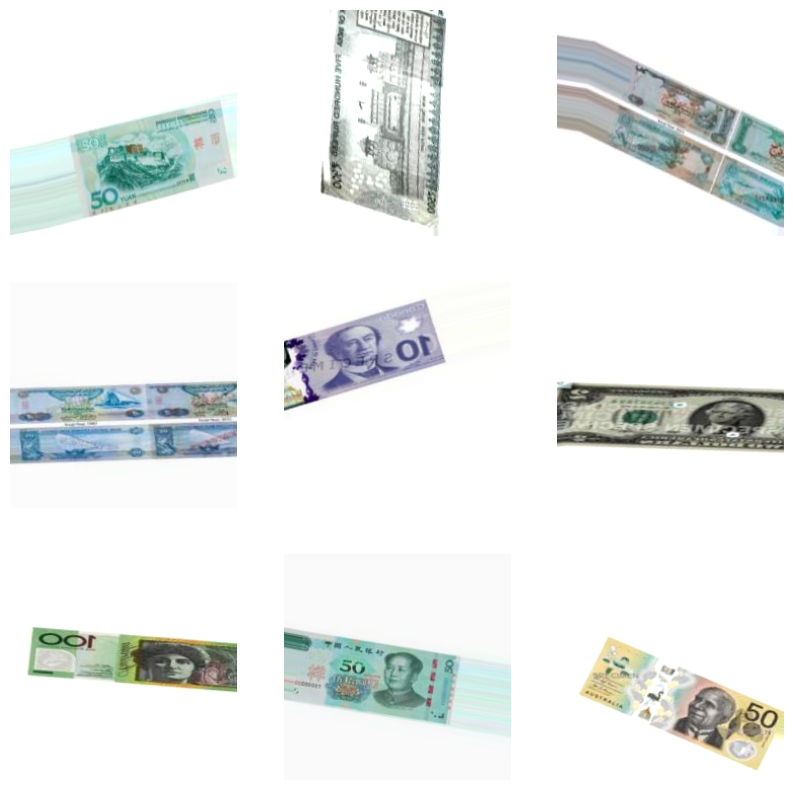

In [ ]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import os

os.makedirs("/content/dataset/fake", exist_ok=True)
print("Fake folder created")

Fake folder created


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

In [ ]:
def create_fake_image(img_path, save_path):

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))

    # Add noise
    noise = np.random.normal(0, 50, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)

    # Blur image
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Random color shift
    img = cv2.convertScaleAbs(img, alpha=random.uniform(0.5,1.5), beta=random.randint(-50,50))

    cv2.imwrite(save_path, img)

In [ ]:
real_base = "/content/dataset"
fake_folder = "/content/dataset/fake"

countries = [c for c in os.listdir(real_base) if c != "fake"]

fake_count = 0
target_fake = 100

while fake_count < target_fake:

    country = random.choice(countries)
    country_folder = os.path.join(real_base, country)

    img_name = random.choice(os.listdir(country_folder))
    img_path = os.path.join(country_folder, img_name)

    save_path = os.path.join(fake_folder, f"fake_{fake_count}.jpg")

    create_fake_image(img_path, save_path)

    fake_count += 1

print("✅ 100 Fake Images Created")


✅ 100 Fake Images Created


In [ ]:
print("Fake images:", len(os.listdir("/content/dataset/fake")))

Fake images: 100


In [ ]:
import shutil

if os.path.exists("/content/final_dataset"):
    shutil.rmtree("/content/final_dataset")

print("Old split deleted")

Old split deleted


In [ ]:
import os

base_path = "/content/dataset"

countries = ["america","australia","canada","china","england","europe","india","uae"]

for country in countries:
    os.makedirs(f"{base_path}/fake_{country}", exist_ok=True)

print("✅ Fake folders created for all countries")

✅ Fake folders created for all countries


In [ ]:
import numpy as np
import cv2
import random

In [ ]:
def create_fake_image(img_path, save_path):

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))

    # Add strong noise
    noise = np.random.normal(0, 60, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)

    # Blur
    img = cv2.GaussianBlur(img, (7,7), 0)

    # Random brightness/contrast
    alpha = random.uniform(0.6, 1.4)
    beta = random.randint(-60, 60)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    cv2.imwrite(save_path, img)

In [ ]:
base_path = "/content/dataset"

for country in countries:

    real_folder = os.path.join(base_path, country)
    fake_folder = os.path.join(base_path, f"fake_{country}")

    real_images = os.listdir(real_folder)

    print(f"Creating fake images for {country}...")

    for i in range(100):

        img_name = random.choice(real_images)
        img_path = os.path.join(real_folder, img_name)

        save_path = os.path.join(fake_folder, f"fake_{country}_{i}.jpg")

        create_fake_image(img_path, save_path)

    print(f"✅ 100 fake images created for {country}")

print("🎉 All fake datasets created successfully")

Creating fake images for america...
✅ 100 fake images created for america
Creating fake images for australia...
✅ 100 fake images created for australia
Creating fake images for canada...
✅ 100 fake images created for canada
Creating fake images for china...
✅ 100 fake images created for china
Creating fake images for england...
✅ 100 fake images created for england
Creating fake images for europe...
✅ 100 fake images created for europe
Creating fake images for india...
✅ 100 fake images created for india
Creating fake images for uae...
✅ 100 fake images created for uae
🎉 All fake datasets created successfully


In [ ]:
for country in countries:
    count = len(os.listdir(f"/content/dataset/fake_{country}"))
    print(f"fake_{country}: {count}")

fake_america: 100
fake_australia: 100
fake_canada: 100
fake_china: 100
fake_england: 100
fake_europe: 100
fake_india: 100
fake_uae: 100


In [ ]:
for country in countries:
    count = len(os.listdir(f"/content/dataset/fake_{country}"))
    print(f"fake_{country}: {count}")

fake_america: 100
fake_australia: 100
fake_canada: 100
fake_china: 100
fake_england: 100
fake_europe: 100
fake_india: 100
fake_uae: 100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
real_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
fake_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7,1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!ls /content/dataset

america    china    fake	    fake_canada   fake_europe  india
australia  england  fake_america    fake_china	  fake_india   uae
canada	   europe   fake_australia  fake_england  fake_uae


In [ ]:
import os
import random
import shutil

base_dir = "/content"
split_dir = "/content/final_dataset"

# Remove old final_dataset if exists
if os.path.exists(split_dir):
    shutil.rmtree(split_dir)

# Select ONLY your class folders (ignore hidden/system folders)
classes = [
    folder for folder in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, folder))
    and not folder.startswith('.')       # remove hidden folders like .config
    and folder not in ["sample_data", "final_dataset"]
]

print("Detected classes:", classes)

for cls in classes:

    images = [
        f for f in os.listdir(os.path.join(base_dir, cls))
        if f.endswith(".jpg") or f.endswith(".png")
    ]

    random.shuffle(images)

    train_split = int(0.6 * len(images))
    val_split = int(0.8 * len(images))

    splits = {
        "train": images[:train_split],
        "val": images[train_split:val_split],
        "test": images[val_split:]
    }

    for split in splits:
        os.makedirs(os.path.join(split_dir, split, cls), exist_ok=True)

        for img in splits[split]:
            shutil.copy(
                os.path.join(base_dir, cls, img),
                os.path.join(split_dir, split, cls, img)
            )

print("✅ final_dataset created successfully")

Detected classes: ['dataset', 'drive']
✅ final_dataset created successfully


In [ ]:
!ls /content/final_dataset

test  train  val


In [ ]:
!ls /content/final_dataset/train

dataset  drive


In [ ]:
!ls /content/final_dataset/train

dataset  drive


In [ ]:
!ls /content/dataset

america    china    fake	    fake_canada   fake_europe  india
australia  england  fake_america    fake_china	  fake_india   uae
canada	   europe   fake_australia  fake_england  fake_uae


In [ ]:
import os

base_path = "/content/dataset"

real_total = 0
fake_total = 0

print("=== REAL & FAKE IMAGE COUNT ===\n")

for folder in os.listdir(base_path):

    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path):

        image_count = len([
            f for f in os.listdir(folder_path)
            if f.endswith(".jpg") or f.endswith(".png")
        ])

        if folder.startswith("fake"):
            fake_total += image_count
            print(f"{folder} → {image_count} FAKE images")
        else:
            real_total += image_count
            print(f"{folder} → {image_count} REAL images")

print("\n===============================")
print("Total REAL images:", real_total)
print("Total FAKE images:", fake_total)
print("Grand Total:", real_total + fake_total)

=== REAL & FAKE IMAGE COUNT ===

fake_india → 100 FAKE images
australia → 100 REAL images
canada → 100 REAL images
fake_england → 100 FAKE images
uae → 100 REAL images
fake_canada → 100 FAKE images
fake_uae → 100 FAKE images
fake_china → 100 FAKE images
fake → 100 FAKE images
fake_europe → 100 FAKE images
india → 100 REAL images
fake_america → 100 FAKE images
china → 100 REAL images
england → 100 REAL images
europe → 100 REAL images
fake_australia → 100 FAKE images
america → 100 REAL images

Total REAL images: 800
Total FAKE images: 900
Grand Total: 1700


In [ ]:
import shutil

shutil.rmtree("/content/dataset/fake")

print("Extra fake folder removed")

Extra fake folder removed


In [ ]:
import os

real_total = 0
fake_total = 0

for folder in os.listdir("/content/dataset"):

    folder_path = os.path.join("/content/dataset", folder)

    if os.path.isdir(folder_path):

        count = len(os.listdir(folder_path))

        if folder.startswith("fake"):
            fake_total += count
        else:
            real_total += count

print("Total REAL:", real_total)
print("Total FAKE:", fake_total)
print("Grand Total:", real_total + fake_total)

Total REAL: 800
Total FAKE: 800
Grand Total: 1600


In [ ]:
import os

base_path = "/content/dataset"

real_counts = {}
fake_counts = {}

for folder in os.listdir(base_path):

    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path):

        count = len([f for f in os.listdir(folder_path) if f.endswith(".jpg")])

        if folder.startswith("fake_"):
            country = folder.replace("fake_", "")
            fake_counts[country] = count
        else:
            real_counts[folder] = count

print("=== COUNTRY-WISE COUNT ===\n")

countries = sorted(real_counts.keys())

for country in countries:
    real = real_counts.get(country, 0)
    fake = fake_counts.get(country, 0)
    print(f"{country} → REAL: {real} | FAKE: {fake}")

print("\n============================")
print("Total REAL:", sum(real_counts.values()))
print("Total FAKE:", sum(fake_counts.values()))

=== COUNTRY-WISE COUNT ===

america → REAL: 100 | FAKE: 100
australia → REAL: 100 | FAKE: 100
canada → REAL: 100 | FAKE: 100
china → REAL: 100 | FAKE: 100
england → REAL: 100 | FAKE: 100
europe → REAL: 100 | FAKE: 100
india → REAL: 100 | FAKE: 100
uae → REAL: 100 | FAKE: 100

Total REAL: 800
Total FAKE: 800


In [ ]:
import os

split_base = "/content/final_dataset"

print("=== FINAL DATASET COUNTRY-WISE COUNT ===\n")

for split in ["train", "val", "test"]:

    print(f"\n--- {split.upper()} ---")

    split_path = os.path.join(split_base, split)

    real_counts = {}
    fake_counts = {}

    for folder in os.listdir(split_path):

        folder_path = os.path.join(split_path, folder)
        count = len(os.listdir(folder_path))

        if folder.startswith("fake_"):
            country = folder.replace("fake_", "")
            fake_counts[country] = count
        else:
            real_counts[folder] = count

    countries = sorted(real_counts.keys())

    for country in countries:
        real = real_counts.get(country, 0)
        fake = fake_counts.get(country, 0)
        print(f"{country} → REAL: {real} | FAKE: {fake}")

=== FINAL DATASET COUNTRY-WISE COUNT ===


--- TRAIN ---
dataset → REAL: 0 | FAKE: 0
drive → REAL: 0 | FAKE: 0

--- VAL ---
dataset → REAL: 0 | FAKE: 0
drive → REAL: 0 | FAKE: 0

--- TEST ---
dataset → REAL: 0 | FAKE: 0
drive → REAL: 0 | FAKE: 0


In [ ]:
import shutil

if os.path.exists("/content/final_dataset"):
    shutil.rmtree("/content/final_dataset")

print("Old incorrect split removed")

Old incorrect split removed


In [ ]:
import os
import random
import shutil

base_dir = "/content/dataset"
split_dir = "/content/final_dataset"

classes = [
    folder for folder in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, folder))
]

print("Detected classes:", classes)

for cls in classes:

    class_path = os.path.join(base_dir, cls)
    images = [f for f in os.listdir(class_path) if f.endswith(".jpg")]

    random.shuffle(images)

    train_split = int(0.6 * len(images))
    val_split = int(0.8 * len(images))

    splits = {
        "train": images[:train_split],
        "val": images[train_split:val_split],
        "test": images[val_split:]
    }

    for split in splits:
        os.makedirs(os.path.join(split_dir, split, cls), exist_ok=True)

        for img in splits[split]:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(split_dir, split, cls, img)
            )

print("✅ Correct 60-20-20 split completed")

Detected classes: ['fake_india', 'australia', 'canada', 'fake_england', 'uae', 'fake_canada', 'fake_uae', 'fake_china', 'fake_europe', 'india', 'fake_america', 'china', 'england', 'europe', 'fake_australia', 'america']
✅ Correct 60-20-20 split completed


In [ ]:
!ls /content/final_dataset/train

america    china    fake_america    fake_china	  fake_india  uae
australia  england  fake_australia  fake_england  fake_uae
canada	   europe   fake_canada     fake_europe   india


In [ ]:
import os

split_base = "/content/final_dataset"

for split in ["train", "val", "test"]:

    print(f"\n--- {split.upper()} ---")

    split_path = os.path.join(split_base, split)

    for folder in sorted(os.listdir(split_path)):
        count = len(os.listdir(os.path.join(split_path, folder)))
        print(f"{folder}: {count}")


--- TRAIN ---
america: 60
australia: 60
canada: 60
china: 60
england: 60
europe: 60
fake_america: 60
fake_australia: 60
fake_canada: 60
fake_china: 60
fake_england: 60
fake_europe: 60
fake_india: 60
fake_uae: 60
india: 60
uae: 60

--- VAL ---
america: 20
australia: 20
canada: 20
china: 20
england: 20
europe: 20
fake_america: 20
fake_australia: 20
fake_canada: 20
fake_china: 20
fake_england: 20
fake_europe: 20
fake_india: 20
fake_uae: 20
india: 20
uae: 20

--- TEST ---
america: 20
australia: 20
canada: 20
china: 20
england: 20
europe: 20
fake_america: 20
fake_australia: 20
fake_canada: 20
fake_china: 20
fake_england: 20
fake_europe: 20
fake_india: 20
fake_uae: 20
india: 20
uae: 20


In [ ]:
import os
import shutil

source_dir = "/content/final_dataset"
binary_dir = "/content/binary_dataset"

# Remove old binary dataset if exists
if os.path.exists(binary_dir):
    shutil.rmtree(binary_dir)

for split in ["train", "val", "test"]:

    for label in ["real", "fake"]:
        os.makedirs(os.path.join(binary_dir, split, label), exist_ok=True)

    split_path = os.path.join(source_dir, split)

    for folder in os.listdir(split_path):

        folder_path = os.path.join(split_path, folder)

        for img in os.listdir(folder_path):

            if folder.startswith("fake_"):
                dest = os.path.join(binary_dir, split, "fake", img)
            else:
                dest = os.path.join(binary_dir, split, "real", img)

            shutil.copy(os.path.join(folder_path, img), dest)

print("✅ Binary dataset created")

✅ Binary dataset created


In [ ]:
import os
import shutil

source_dir = "/content/final_dataset"
binary_dir = "/content/binary_dataset"

# Remove old binary dataset if exists
if os.path.exists(binary_dir):
    shutil.rmtree(binary_dir)

for split in ["train", "val", "test"]:

    for label in ["real", "fake"]:
        os.makedirs(os.path.join(binary_dir, split, label), exist_ok=True)

    split_path = os.path.join(source_dir, split)

    for folder in os.listdir(split_path):

        folder_path = os.path.join(split_path, folder)

        for img in os.listdir(folder_path):

            if folder.startswith("fake_"):
                dest = os.path.join(binary_dir, split, "fake", img)
            else:
                dest = os.path.join(binary_dir, split, "real", img)

            shutil.copy(os.path.join(folder_path, img), dest)

print("✅ Binary dataset created")

✅ Binary dataset created


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

binary_model = Model(inputs=base_model.input, outputs=output)

binary_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

binary_model = Model(inputs=base_model.input, outputs=output)

binary_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
!ls /content/binary_dataset/train

fake  real


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/binary_dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    '/content/binary_dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 958 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
import os

train_path = "/content/binary_dataset/train"

print("=== TRAIN CLASS COUNT ===\n")

for folder in os.listdir(train_path):
    count = len(os.listdir(os.path.join(train_path, folder)))
    print(f"{folder}: {count}")

=== TRAIN CLASS COUNT ===

fake: 480
real: 478


In [ ]:
dest = os.path.join(binary_dir, split, "real", img)


In [ ]:
dest = os.path.join(binary_dir, split, "real", img)


In [ ]:
import shutil

if os.path.exists("/content/binary_dataset"):
    shutil.rmtree("/content/binary_dataset")

print("Old binary dataset removed")

Old binary dataset removed


In [ ]:
import os
import shutil

source_dir = "/content/final_dataset"
binary_dir = "/content/binary_dataset"

for split in ["train", "val", "test"]:

    for label in ["real", "fake"]:
        os.makedirs(os.path.join(binary_dir, split, label), exist_ok=True)

    split_path = os.path.join(source_dir, split)

    for folder in os.listdir(split_path):

        folder_path = os.path.join(split_path, folder)

        for img in os.listdir(folder_path):

            # Create UNIQUE filename
            new_name = f"{folder}_{img}"

            if folder.startswith("fake_"):
                dest = os.path.join(binary_dir, split, "fake", new_name)
            else:
                dest = os.path.join(binary_dir, split, "real", new_name)

            shutil.copy(os.path.join(folder_path, img), dest)

print("✅ Binary dataset recreated correctly")

✅ Binary dataset recreated correctly


In [ ]:
train_path = "/content/binary_dataset/train"

for folder in os.listdir(train_path):
    count = len(os.listdir(os.path.join(train_path, folder)))
    print(f"{folder}: {count}")

fake: 480
real: 480


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/binary_dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    '/content/binary_dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 960 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
history = binary_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 247s 8s/step - accuracy: 0.5857 - loss: 0.6373 - val_accuracy: 0.6750 - val_loss: 0.5091
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 230s 8s/step - accuracy: 0.8669 - loss: 0.4338 - val_accuracy: 0.9750 - val_loss: 0.3207
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.9650 - loss: 0.2896 - val_accuracy: 0.9719 - val_loss: 0.2357
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.9700 - loss: 0.2148 - val_accuracy: 0.9750 - val_loss: 0.1772
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 263s 8s/step - accuracy: 0.9746 - loss: 0.1693 - val_accuracy: 0.9531 - val_loss: 0.1573
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.9725 - loss: 0.1320 - val_accuracy: 0.9937 - val_loss: 0.1383
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 228s 8s/step - accuracy: 0.9753 - loss: 0.1298 - val_accuracy: 0.9719 - val_loss: 0.1086
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 253s 9s/step - accuracy: 0.9659 - loss: 0.1113 - val_accuracy: 0.9750 - v

In [ ]:
test_gen = val_datagen.flow_from_directory(
    '/content/binary_dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = binary_model.evaluate(test_gen)
print("Test Accuracy:", test_acc)

Found 320 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9973 - loss: 0.0732
Test Accuracy: 0.9906250238418579


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

predictions = binary_model.predict(test_gen)
pred_labels = (predictions > 0.5).astype(int)

true_labels = test_gen.classes

print("Confusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))

print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))

10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step
Confusion Matrix:
[[160   0]
 [  3 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       160
           1       1.00      0.98      0.99       160

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen_16 = train_datagen.flow_from_directory(
    '/content/final_dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_gen_16 = val_datagen.flow_from_directory(
    '/content/final_dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 960 images belonging to 16 classes.
Found 320 images belonging to 16 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load base model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(16, activation='softmax')(x)

model_16 = Model(inputs=base_model.input, outputs=output)

model_16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ 16-Class Model Created Successfully")

✅ 16-Class Model Created Successfully


In [ ]:
history_16 = model_16.fit(
    train_gen_16,
    validation_data=val_gen_16,
    epochs=10
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 257s 8s/step - accuracy: 0.2405 - loss: 2.0631 - val_accuracy: 0.2406 - val_loss: 2.0873
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 235s 8s/step - accuracy: 0.2594 - loss: 2.0462 - val_accuracy: 0.1844 - val_loss: 2.0734
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 232s 8s/step - accuracy: 0.2285 - loss: 2.0180 - val_accuracy: 0.2250 - val_loss: 2.0588
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 257s 9s/step - accuracy: 0.2236 - loss: 2.0080 - val_accuracy: 0.2313 - val_loss: 2.0175
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.2369 - loss: 1.9897 - val_accuracy: 0.2469 - val_loss: 1.9796
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.2680 - loss: 1.9400 - val_accuracy: 0.2688 - val_loss: 1.9608
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 232s 8s/step - accuracy: 0.2650 - loss: 1.9176 - val_accuracy: 0.2781 - val_loss: 1.9877
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.2586 - loss: 1.9385 - val_accuracy: 0.2625 - v

In [ ]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model_16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Fine-tuning enabled")

✅ Fine-tuning enabled


In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # freeze initially

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(16, activation='softmax')(x)

model_16 = Model(inputs=base_model.input, outputs=output)

model_16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ MobileNetV2 Model Created")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ MobileNetV2 Model Created


In [ ]:
history_16 = model_16.fit(
    train_gen_16,
    validation_data=val_gen_16,
    epochs=10
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9594 - loss: 0.1240 - val_accuracy: 0.8687 - val_loss: 0.4094
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9644 - loss: 0.1293 - val_accuracy: 0.8687 - val_loss: 0.3982
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9720 - loss: 0.0947 - val_accuracy: 0.8656 - val_loss: 0.4262
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9722 - loss: 0.0955 - val_accuracy: 0.8687 - val_loss: 0.3820
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9720 - loss: 0.0996 - val_accuracy: 0.8844 - val_loss: 0.3810
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9645 - loss: 0.0995 - val_accuracy: 0.8656 - val_loss: 0.4611
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9616 - loss: 0.1124 - val_accuracy: 0.8594 - val_loss: 0.4278
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9757 - loss: 0.0803 - val_accuracy: 0.8906 - val_loss:

In [ ]:
test_gen_16 = val_datagen.flow_from_directory(
    '/content/final_dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model_16.evaluate(test_gen_16)
print("16-Class Test Accuracy:", test_acc)

Found 320 images belonging to 16 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9108 - loss: 0.2647
16-Class Test Accuracy: 0.862500011920929


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

predictions = model_16.predict(test_gen_16)
pred_labels = np.argmax(predictions, axis=1)

true_labels = test_gen_16.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0 11  2  3  2  1  1  0  0  0]
 [ 0  0  0  0  0  0  1  1 16  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1 15  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  2 12  0  4  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  1 15  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  5 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95  

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

========= FINAL RESULT =========
Currency Country : CANADA
Authentication   : FAKE
Auth Confidence  : 100.00%
Country Accuracy : 97.89%



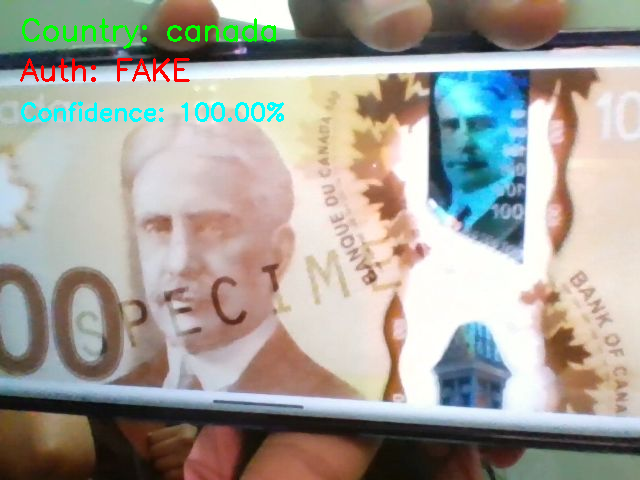

In [ ]:
# ==========================================
# COMPLETE CURRENCY AUTHENTICATION SYSTEM
# ==========================================

import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# ---------------------------
# Webcam Capture Function
# ---------------------------
def take_photo(filename='captured.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


# ---------------------------
# Prediction System
# ---------------------------
def currency_authentication_system():

    img_path = take_photo()

    # Load image for model
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ========== STEP 1: REAL / FAKE ==========
    binary_prediction = binary_model.predict(img_array)[0][0]

    if binary_prediction > 0.5:
        authentication = "FAKE"
        auth_confidence = binary_prediction * 100
    else:
        authentication = "REAL"
        auth_confidence = (1 - binary_prediction) * 100

    # ========== STEP 2: COUNTRY ==========
    class_labels = list(train_gen_16.class_indices.keys())
    multi_prediction = model_16.predict(img_array)[0]
    class_index = np.argmax(multi_prediction)
    class_confidence = multi_prediction[class_index] * 100
    predicted_class = class_labels[class_index]

    # Extract country name
    if predicted_class.startswith("fake_"):
        country = predicted_class.replace("fake_", "")
    else:
        country = predicted_class

    # ========== DISPLAY RESULT ==========
    print("\n========= FINAL RESULT =========")
    print(f"Currency Country : {country.upper()}")
    print(f"Authentication   : {authentication}")
    print(f"Auth Confidence  : {auth_confidence:.2f}%")
    print(f"Country Accuracy : {class_confidence:.2f}%")
    print("=================================\n")

    # ========== SHOW IMAGE WITH TEXT ==========
    img_display = cv2.imread(img_path)

    cv2.putText(img_display, f"Country: {country}", (20,40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.putText(img_display, f"Auth: {authentication}", (20,80),
                cv2.FONT_HERSHEY_SIMPLEX, 1,
                (0,0,255) if authentication=="FAKE" else (0,255,0), 2)

    cv2.putText(img_display, f"Confidence: {auth_confidence:.2f}%", (20,120),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,0), 2)

    from google.colab.patches import cv2_imshow
    cv2_imshow(img_display)


# ---------------------------
# RUN SYSTEM
# ---------------------------
currency_authentication_system()